In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cpu


In [35]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [19]:
weight = 0.3
bias = 0.9

start = 0
end = 10
step = 0.1

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [21]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [28]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(1,1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
    def predict(self, x: torch.Tensor) -> torch.Tensor:
        self.eval()
        with torch.inference_mode():
            preds = self.forward(x)
        return preds

In [41]:
model = LinearRegressionModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

In [42]:
torch.manual_seed = 1

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 1.7886972427368164 | Test loss: 2.9216530323028564
Epoch: 100 | Train loss: 0.11307935416698456 | Test loss: 0.049805354326963425
Epoch: 200 | Train loss: 0.14075422286987305 | Test loss: 0.03793182224035263
Epoch: 300 | Train loss: 0.1458934247493744 | Test loss: 0.03298457711935043
Epoch: 400 | Train loss: 0.1458934247493744 | Test loss: 0.03298457711935043
Epoch: 500 | Train loss: 0.1458934247493744 | Test loss: 0.03298457711935043
Epoch: 600 | Train loss: 0.1458934247493744 | Test loss: 0.03298457711935043
Epoch: 700 | Train loss: 0.1458934247493744 | Test loss: 0.03298457711935043
Epoch: 800 | Train loss: 0.1458934247493744 | Test loss: 0.03298457711935043
Epoch: 900 | Train loss: 0.1458934247493744 | Test loss: 0.03298457711935043


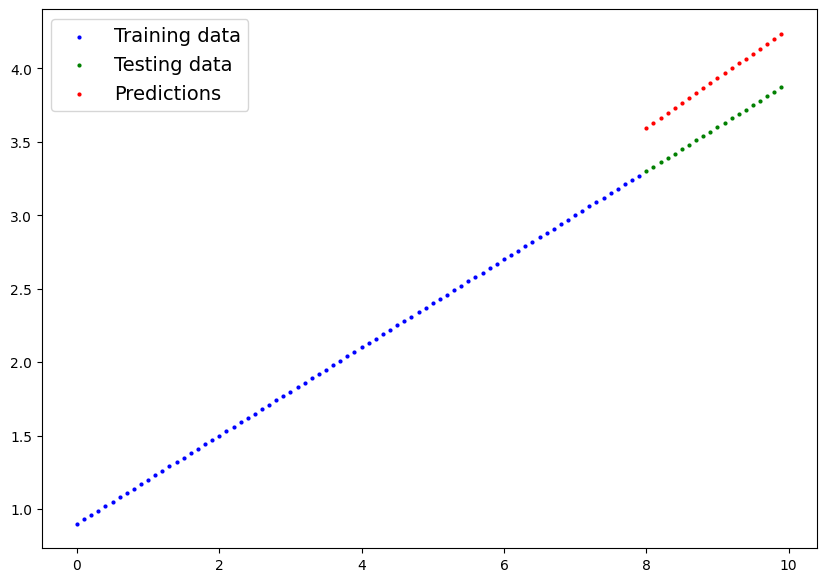

In [43]:
y_pred = predictions=model.predict(X_test)
plot_predictions(predictions=y_pred)
